In [1]:
cd /home/disk2/wdd/PDZ/12concentration

/home/disk2/wdd/PDZ/12concentration


In [2]:
import mdtraj as md
import numpy as np

In [133]:
# crystal trj
t=md.load('c_fit.xtc',top='begin_cry.pdb')
indices_phi_con, phi_con=md.compute_phi(t)
indices_psi_con, psi_con=md.compute_psi(t)

In [24]:
chainB_noh=[atom.index for atom in t.topology.chain(1).atoms if ((atom.residue.index > 115) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
#[atom.residue.index for atom in t.topology.chain(1).atoms if ((atom.residue.index >= 5) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
#chainB_noh2=[atom.index for atom in t.topology.chain(1).atoms if ( (atom.residue.index >= 9) and (atom.element.symbol != 'H'))]
chainB_rmsds=md.rmsd(t,t,0,atom_indices=chainB_noh)

In [142]:
i=1
outname='cryDih.dih'
wf=open(outname,'w')
wf.write('#phi phi phi phi phi psi psi psi psi \n')
for j in range(len(psi_con)):
    for hh in range(5):
        wf.write(str(phi_con[j][109+5*i+hh]/3.14*180)+'    ')
    for ss in range(4):
        wf.write(str(psi_con[j][110+4*i+ss]/3.14*180)+'    ')
    wf.write('\n')
wf.close()


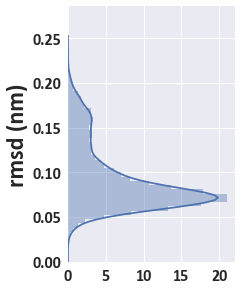

In [225]:
time_step=0.01       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig, ax = plt.subplots(figsize=(3,4.7))
time = np.arange(len(chainB_rmsds))*time_step
#ax.plot(time,chainB_rmsds)
ax = sns.distplot(chainB_rmsds, vertical=True)
#ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
ax.set_ylabel('rmsd (nm)',fontproperties=font_prop)
#ax.set_xlabel('time (ns)',fontproperties=font_prop)
plt.ylim(0,np.max(chainB_rmsds)*1.2)
#plt.xlim(0,np.max(time))
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig("cry_chianB_rmsd_hist.png",dpi=600,bbox_inches='tight')
plt.show()

In [222]:
atom_pairs=[[1810,386],[1810,1177],[1799,406],[1799,1177],[1785,420],[1785,1119],[1768,439],[1768,1077],[1746,458],[1746,1077]]
distances=md.compute_distances(t,atom_pairs=atom_pairs)

In [223]:
distances_ave=np.mean(distances,axis=1)

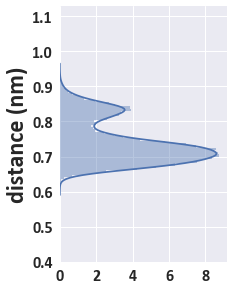

In [224]:
time_step=0.01       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig, ax = plt.subplots(figsize=(3,4.7))
time = np.arange(len(chainB_rmsds))*time_step
#ax.plot(time,distances_ave)
ax = sns.distplot(distances_ave, vertical=True)
#ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
ax.set_ylabel('distance (nm)',fontproperties=font_prop)
#ax.set_xlabel('time (ns)',fontproperties=font_prop)
plt.ylim(0.4,np.max(distances_ave)*1.2)
#plt.xlim(0,np.max(time))
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig("cry_distances_AB_hist.png",dpi=600,bbox_inches='tight')
plt.show()

In [143]:
wf=open('rmsd_distance_cry.cs','w')
for i in range(len(distances_ave)):
    wf.write(str(chainB_rmsds[i])+'    '+str(distances_ave[i])+'\n')
wf.close()

filename='cryDih.dih'
data=np.loadtxt(filename)
outname = 'rmsdDih_distance_cry.cs'
wf=open(outname,'w')
for j in range(len(data)):
    rmsd=singleSD(data[j],crystal_phi_psi)
    wf.write(str(rmsd)+'    '+str(distances_ave[j])+'\n')
wf.close()

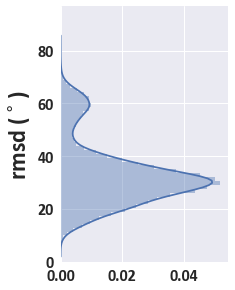

In [220]:
Dih=np.loadtxt('rmsdDih_distance_cry.cs')
time_step=0.01       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig, ax = plt.subplots(figsize=(3,4.7))
time = np.arange(len(Dih))*time_step
#ax.plot(time,Dih[:,0])
ax = sns.distplot(Dih[:,0], vertical=True)
#ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
#ax.set_xlabel('time (ns)',fontproperties=font_prop)
plt.ylim(0,np.max(Dih[:,0])*1.2)
#plt.xlim(0,np.max(time))
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig("cry_chianB_rmsdDih_test.png",dpi=600,bbox_inches='tight')
plt.show()

In [34]:
t_con=md.load('fit1.xtc',top='begin.pdb',stride=10)
t_ref=md.load('12con_ref.pdb',top='12con_ref.pdb')

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/mdtraj-1.8.0-py2.7-linux-x86_64.egg/mdtraj/core/trajectory.py:417: UserWarning: top= kwarg ignored since file contains topology information
  warnings.warn('top= kwarg ignored since file contains topology information')


In [40]:
#[atom.residue.index for atom in t_ref.topology.chain(3).atoms if ((atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
conB_noh=[atom.index for atom in t_con.topology.chain(1).atoms if ((atom.residue.index > 115 and atom.residue.index <= 120) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
conB_rmsds=md.rmsd(t_con,t_ref,0,atom_indices=conB_noh)

In [48]:
conB_rmsds

array([ 0.03013198,  0.07731958,  0.13735053, ...,  0.16278942,
        0.13547382,  0.16264711], dtype=float32)

In [164]:
for nt in [1,2,3,4,5,6,7,8,10,11,12]:
    t_con=md.load('fit'+str(nt)+'.xtc',top='begin.pdb',stride=10)
    for i in range(1,13):
        con_noh=[atom.index for atom in t_con.topology.chain(i).atoms if ((atom.residue.index > (109+6*i) and atom.residue.index <= (114+6*i)) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
        con_rmsds=md.rmsd(t_con,t_ref,0,atom_indices=con_noh)
        atom_pairs=[[1723+87*i,386],[1723+87*i,1177],[1712+87*i,406],[1712+87*i,1177],[1698+87*i,420],[1698+87*i,1119],[1681+87*i,439],[1681+87*i,1077],[1659+87*i,458],[1659+87*i,1077]]
        distances=md.compute_distances(t_con,atom_pairs=atom_pairs)
        distances_ave=np.mean(distances,axis=1)
        outname='fit'+str(nt)+'_pdz'+str(i)+'.rmsd_dist'
        wf=open(outname,'w')
        wf.write('#rmsd     distance\n')
        for j in range(len(con_rmsds)):
            wf.write(str(con_rmsds[j])+'    '+str(distances_ave[j])+'\n')
        wf.close()

In [60]:
for nt in [5,6,7,8]:
    t_con=md.load('fit'+str(nt)+'_all.xtc',top='begin.pdb',stride=10)
    for i in range(1,13):
        con_noh=[atom.index for atom in t_con.topology.chain(i).atoms if ((atom.residue.index > (109+6*i) and atom.residue.index <= (114+6*i)) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
        con_rmsds=md.rmsd(t_con,t_ref,0,atom_indices=con_noh)
        atom_pairs=[[1723+87*i,386],[1723+87*i,1177],[1712+87*i,406],[1712+87*i,1177],[1698+87*i,420],[1698+87*i,1119],[1681+87*i,439],[1681+87*i,1077],[1659+87*i,458],[1659+87*i,1077]]
        distances=md.compute_distances(t_con,atom_pairs=atom_pairs)
        distances_ave=np.mean(distances,axis=1)
        outname='fit'+str(nt)+'_pdz'+str(i)+'.cs'
        wf=open(outname,'w')
        wf.write('#rmsd     distance\n')
        for j in range(len(con_rmsds)):
            wf.write(str(con_rmsds[j])+'    '+str(distances_ave[j])+'\n')
        wf.close()

In [47]:
pwd

u'/home/disk2/wdd/PDZ/12concentration'

In [56]:
[atom.index for atom in t_ref.topology.chain(3).atoms if ((atom.name in ['CA']))]

[1920, 1942, 1959, 1973, 1984]

In [67]:
data = np.loadtxt('all_rmsd_dist.cs')
x = data[:,0]
y = data[:,1]
denname = 'pmf.cs'
wf = open(denname,'w')
wf.write('#x    y     z\n')
#H, xedges, yedges = np.histogram2d(x, y, bins=[50,50],range=[[0, 0.4], [0, 6]])
H, xedges, yedges = np.histogram2d(x, y, bins=[50,50])
H = H.T
for i in range(len(H)):
    for j in range(len(H[i])):
        if H[i][j]==0:
            en =10
        else:
            en = -np.log(H[i][j]/len(data))*0.6155
        wf.write(str(en)+"    ")
    wf.write("\n")
wf.close()

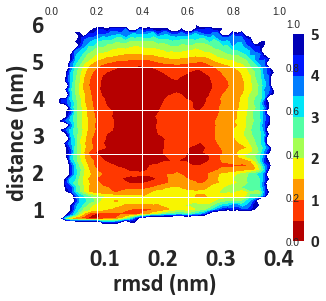

In [70]:
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
HH = np.loadtxt(denname)
Hn = HH - np.amin(HH)
fig = plt.figure(figsize=(5.1, 4))
ax = fig.add_subplot(111)
cmap = plt.cm.get_cmap("jet_r")
cmap.set_over("white")
CS = plt.contourf(xedges[1:],yedges[1:],Hn,levels = np.linspace(0,5,11),cmap=cmap,extend="max")
cbar = plt.colorbar(CS)
plt.xlabel(r'rmsd (nm)',fontproperties=font_prop)
plt.ylabel(r'distance (nm)',fontproperties=font_prop)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(leg_prop)
plt.savefig('pmf_rmsd_distance.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

In [91]:
indices_phi_ref, phi_ref=md.compute_phi(t_ref)
indices_psi_ref, psi_ref=md.compute_psi(t_ref)
-1.0471828 ,
         -2.4347167 , -2.25376797, -1.56287026, -2.24224329
    2.59215426,
          2.26425838,  2.36080599,  2.31699634

In [101]:
crystal_phi_psi=[ -60.02958679, -139.56974792, -129.19688416,  -89.59128571,
       -128.53622437,  148.59483337,  129.79824829,  135.33282471,
        132.82144165]

In [129]:
#for nt in [1,2,3,4,10,11,12]:
for nt in range(1,2):
    t_con=md.load('/home/disk2/wdd/PDZ/12concentration/trj/all/fit'+str(nt)+'_skip10.xtc',top='/home/disk2/wdd/PDZ/12concentration/begin.pdb')
    indices_phi, phi=md.compute_phi(t_con)
    indices_psi, psi=md.compute_psi(t_con)
    for i in range(1,13):
        outname='fit'+str(nt)+'_pdz'+str(i)+'.dih'
        wf=open(outname,'w')
        wf.write('#phi phi phi phi phi psi psi psi psi \n')
        for j in range(len(psi)):
            for hh in range(5):
                wf.write(str(phi[j][109+5*i+hh]/3.14*180)+'    ')
            for ss in range(4):
                wf.write(str(psi[j][110+4*i+ss]/3.14*180)+'    ')
            wf.write('\n')
        wf.close()

In [119]:
#function of rmsd 
def singleSD(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        if np.abs(sub)>180:
            sub=360-np.abs(sub)
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)

In [131]:
for nt in [1,2,3,4,5,6,7,8,10,11,12]:
    print nt
    for i in range(1,13):
        dist = np.loadtxt('fit'+str(nt)+'_pdz'+str(i)+'.cs')
        filename='fit'+str(nt)+'_pdz'+str(i)+'.dih'
        data=np.loadtxt(filename)
        outname = 'fit'+str(nt)+'_pdz'+str(i)+'.rmsd_dih'
        wf=open(outname,'w')
        for j in range(len(data)):
            rmsd=singleSD(data[j],crystal_phi_psi)
            wf.write(str(rmsd)+'    '+str(dist[j][1])+'\n')
        wf.close()

1
2
3
4
5
6
7
8
10
11
12


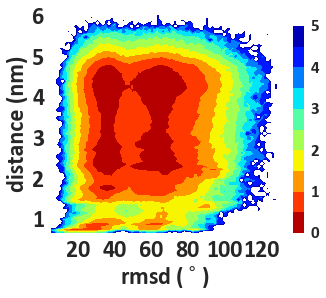

In [132]:
data = np.loadtxt('all_rmsdDih_dist.cs')
x = data[:,0]
y = data[:,1]
denname = 'pmfDih.cs'
wf = open(denname,'w')
wf.write('#x    y     z\n')
#H, xedges, yedges = np.histogram2d(x, y, bins=[50,50],range=[[0, 0.4], [0, 6]])
H, xedges, yedges = np.histogram2d(x, y, bins=[80,80])
H = H.T
for i in range(len(H)):
    for j in range(len(H[i])):
        if H[i][j]==0:
            en =10
        else:
            en = -np.log(H[i][j]/len(data))*0.6155
        wf.write(str(en)+"    ")
    wf.write("\n")
wf.close()
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
HH = np.loadtxt(denname)
Hn = HH - np.amin(HH)
fig = plt.figure(figsize=(5.1, 4))
ax = fig.add_subplot(111)
cmap = plt.cm.get_cmap("jet_r")
cmap.set_over("white")
CS = plt.contourf(xedges[1:],yedges[1:],Hn,levels = np.linspace(0,5,11),cmap=cmap,extend="max")
cbar = plt.colorbar(CS)
plt.xlabel(r'rmsd ($^\circ$)',fontproperties=font_prop)
plt.ylabel(r'distance (nm)',fontproperties=font_prop)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(leg_prop)
plt.savefig('pmf_rmsdDih_distance.jpg',dpi=600,bbox_inches='tight')
    #label.set_fontsize(16)
#plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
plt.show()

In [140]:
pwd

array([ 0.7222566 ,  0.70003033,  0.72648221, ...,  0.72879964,
        0.70942736,  0.70458323], dtype=float32)

In [145]:
distances[10190]

array([ 0.55720562,  0.60871512,  0.42163259,  0.92865986,  0.57528263,
        0.85009289,  0.65020692,  1.18678522,  1.30751443,  1.46101284], dtype=float32)

In [147]:
distances[0]

array([ 0.53118175,  0.69912583,  0.4116126 ,  1.00863075,  0.52737945,
        0.71212989,  0.53689945,  1.05553222,  0.73956954,  1.00050437], dtype=float32)

In [148]:
pwd

u'/home/disk2/wdd/PDZ/12concentration'

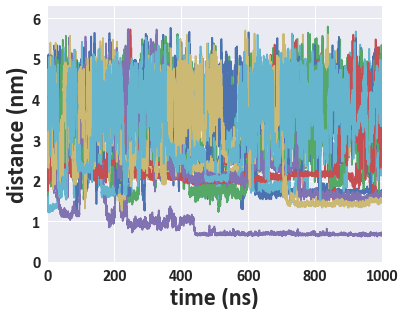

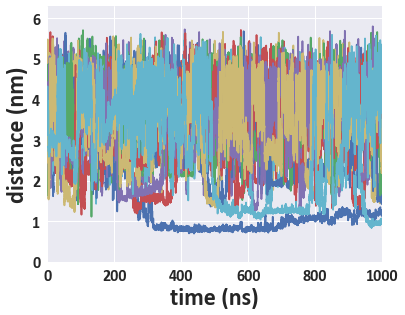

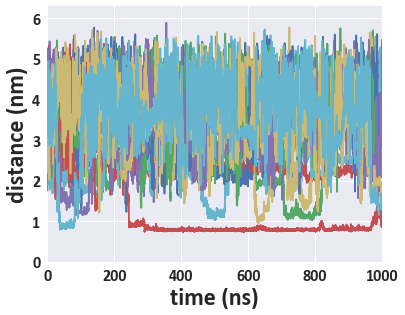

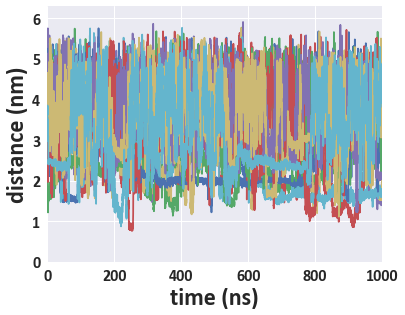

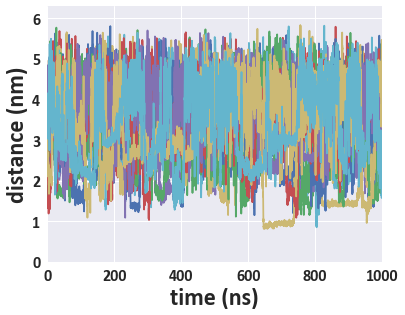

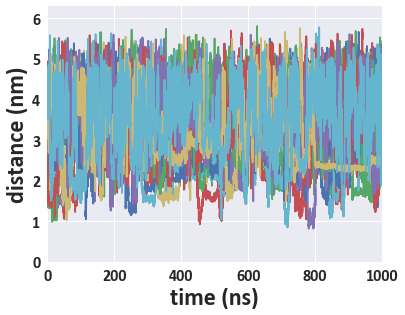

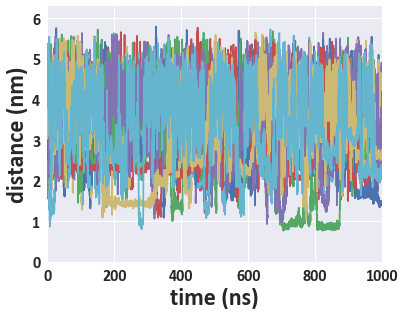

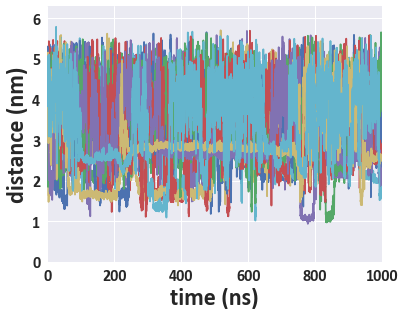

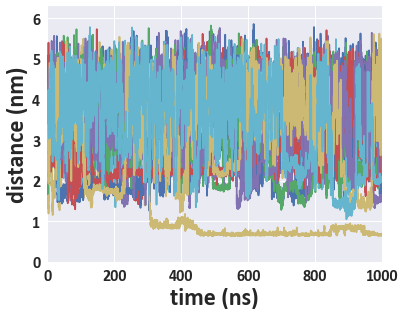

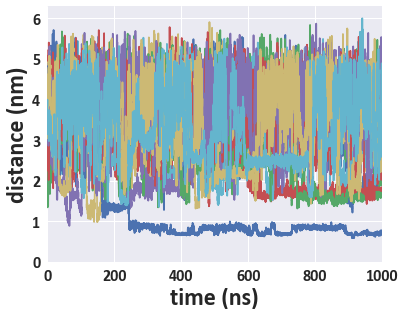

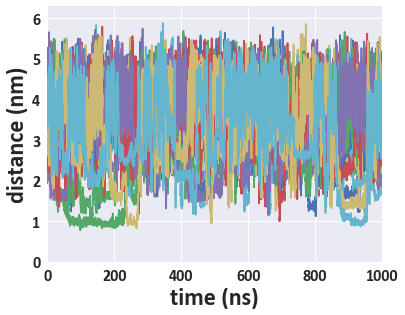

In [163]:
-
        

In [227]:
cd rmsd_dist/

/home/disk2/wdd/PDZ/12concentration/rmsd_dist


In [184]:
chr(65)

'A'

In [170]:
import MDAnalysis
import MDAnalysis.analysis.hbonds

In [193]:
#for nt in [1,2,3,4,5,6,7,8,10,11,12]:
for nt in [1]:
    #t_con=md.load('fit'+str(nt)+'.xtc',top='begin.pdb',stride=10)
    xtc='fit'+str(nt)+'_skip10.xtc'
    u = MDAnalysis.Universe('begin.pdb', xtc)
    for i in range(4,5):
        chainname=chr(65+i)
        print chainname
        outfile = 'fit'+str(nt)+'_pdz_chain_'+chainname+'_hbonds_as_time.hbonds'
        h = MDAnalysis.analysis.hbonds.HydrogenBondAnalysis(u, selection1='segid A',selection2='segid '+chainname, distance=3.5, angle=150.0,distance_type='heavy')
        wf = open(outfile,'w')
        h.run()
        h.generate_table()
        for i in range(len(h.table)):
            for j in range(len(h.table[i])):
                wf.write(str(h.table[i][j])+"       ")
            wf.write("\n")
        wf.close()

E


HBonds frame 10000: 10001/10001 [100.0%]


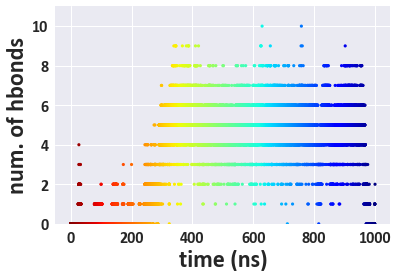

In [214]:
#hbonds
nt=3
chainname='J'
fname = 'fit'+str(nt)+'_pdz_chain_'+chainname+'_hbonds_as_time.hbonds'
rf = open(fname,'r')
allframe=[0]*10001
for line in rf:
    col=line.split()
    frame=int(float(col[0])/100)
    allframe[frame]+=1
alltime=np.arange(10001)/10
cmap = plt.cm.get_cmap("jet_r")
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(alltime,allframe,c=np.arange(len(data)),cmap=cmap,lw = 0,s=10)
    #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
ax.set_ylabel('num. of hbonds',fontproperties=font_prop)
ax.set_xlabel('time (ns)',fontproperties=font_prop)
plt.ylim(0,11)
#plt.xlim(0,1000)
#ax.set_xticks(np.linspace(0,1200,7))
#ax.set_xticklabels([0,200,400,600,800,1000])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig(fname.split('.')[0]+'.png',dpi=600,bbox_inches='tight')
plt.show()

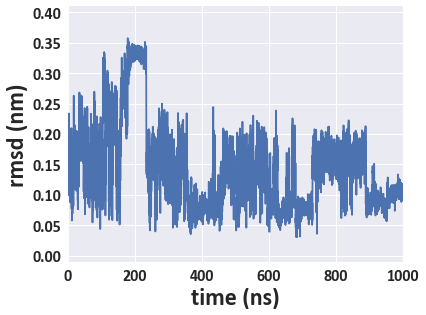

In [233]:
#rmsd
time_step=0.1       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
for nt in [11]:
#for nt in [1]:
    fig, ax = plt.subplots(figsize=(6,4.7))
    for i in range(7,8):
        data = np.loadtxt('fit'+str(nt)+'_pdz'+str(i)+'.rmsd_dist')
        dist = data[:,0]
        time = np.arange(len(dist))*time_step
        ax.plot(time,dist,label=str(i))
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('rmsd (nm)',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(-0.01,0.41)
    plt.xlim(0,1000)
    #ax.set_xticks(np.linspace(0,1200,7))
    #ax.set_xticklabels([0,200,400,600,800,1000])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig("fit"+str(nt)+"_rmsd"+str(i)+".png",dpi=600,bbox_inches='tight')
    plt.show()

In [236]:
77.1/45.7

1.6870897155361049

In [237]:
1.2/0.58

2.0689655172413794

In [238]:
letters = {'ALA':'A','ARG':'R','ASN':'N','ASP':'D','CYS':'C','GLU':'E','GLN':'Q','GLY':'G','HIS':'H',
           'ILE':'I','LEU':'L','LYS':'K','MET':'M','PHE':'F','PRO':'P','SER':'S','THR':'T','TRP':'W',
           'TYR':'Y','VAL':'V'}

In [239]:
letters.keys()

['CYS',
 'ASP',
 'SER',
 'GLN',
 'LYS',
 'ILE',
 'PRO',
 'THR',
 'PHE',
 'ALA',
 'GLY',
 'HIS',
 'GLU',
 'LEU',
 'ARG',
 'TRP',
 'VAL',
 'ASN',
 'TYR',
 'MET']